# Adapter


## O que é?

O padrao _adapter_, também conhecido como _wrapper_, permite a interacao entre duas interfaces incompatíveis, convertendo a interface do objeto adaptado numa interface esperada pelo cliente.

## Por quê?

O _adapter_ é particularmente útil quando estamos trabalhando com interfaces sobre as quais nao temos controle -- libraries, APIs criadas por vendors externos, ou software produzido por um time diferente. Ele permite a criacao de código reusável mesmo quando há incompatibilidades entre as interfaces.

## Estrutura: 

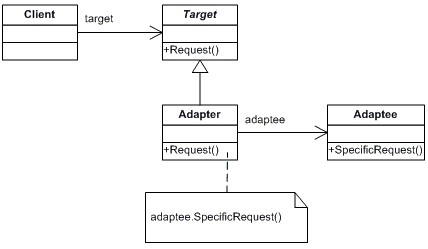

## Exemplo 1:

Imaginemos que trabalhamos numa empresa de classificados no estilo páginas amarelas. Uma das nossas funcoes é atualizar o número de telefone do anunciante quando há uma mudanca. Como estamos no século XX, tudo é simples: nossas páginas amarelas sao apenas um enorme arquivo de texto, e podemos fazer a mudanca usando o método `replace`.

In [12]:
class Updater:
    def __init__(self, yellow_pages: str):
        self.yellow_pages = yellow_pages
        
    def update(self, old_number: str, new_number: str):
        self.yellow_pages = self.yellow_pages.replace(old_number, new_number)
        
yellow_page_sample = "Mesbla - (11) 884-7654\nMappin - (11) 433-9980\nBamerindus - (11) 247-9801"

u1 = Updater(yellow_page_sample)

u1.update('(11) 247-9801', '(11) 555-7890')

u1.yellow_pages

'Mesbla - (11) 884-7654\nMappin - (11) 433-9980\nBamerindus - (11) 555-7890'

Com a inesperada chegada do século XXI, porém, alguém decide que é hora de armazenar nossas páginas amarelas num  banco de dados. Em vez de um arquivo de texto, agora nossas `yellow_pages` têm uma interace totalmente diferente:

In [10]:
class YellowPages:
    
    def connect(self):
        print("Connecting to YellowPages database")
        
    def super_safe_query(self, query: str):
        print(f"Executing query {query} in YellowPages database")
        
    def commit(self):
        print("Permanently storing changes in the YellowPages database. God bless us all")


Diante dessa mudanca, à primeira vista, seria necessário mudar totalmente nossa classe `Updater`, certo? Ou, caso ainda precisemos do `Updater` para manter vivo nosso pujante negócio de venda de páginas amarelas impressas, precisaríamos criar um novo updater para atualizar os números de telefone em nosso banco de dados. 

O padrao _adapter_ permite uma terceira opcao: manter nosso `Updater` como está e usar um adaptador para permitir que o `Updater` e as `YellowPages` conversem entre si. Nesse caso, por exemplo, o adaptador precisa expor apenas o método `replace`.

In [11]:
class YellowPageAdapter: 
    
    def __init__(self, yellow_pages: YellowPages):
        self.yellow_pages = yellow_pages
        
    def replace(self, old_number: str, new_number: str):
        self.yellow_pages.connect()
        query_string = f"UPDATE client_list SET phone_number = {new_number} WHERE phone_number = {old_number}"
        self.yellow_pages.super_safe_query(query_string)
        self.yellow_pages.commit()
        
yellow_page_sample2 = YellowPages()

yellow_page_sample2_adapter = YellowPageAdapter(yellow_page_sample2)

u2 = Updater(yellow_page_sample2_adapter)
    
u2.update('(11) 247-9801', '(11) 555-7890')

Connecting to YellowPages database
Executing query UPDATE client_list SET phone_number = (11) 555-7890 WHERE phone_number = (11) 247-9801 in YellowPages database
Permanently storing changes in the YellowPages database. God bless us all


## Exemplo 2: 

O exemplo anterior pode ser descrito como um **object adapter**: usamos object composition no nosso adaptador para ter acesso aos métodos da classe `YellowPages`. Outra opcao, porém, é usar *inheritance* com esse propósito. Suponhamos que temos uma classe `LoadBalancer` cuja funcao é distribuir requests para nossos servidores. No entanto, estamos no século XX e precisamos checar a temperatura de nossos servidores físicos antes de usá-los: nao queremos que o superaquecimento provoque um incêndio em nossa fábrica de páginas amarelas:

In [6]:
import random
from typing import List

class LegacyServer: 
    
    def is_overheating(self): 
        '''
        Randomly overheats for no reason
        '''
        return random.choice([True, False])
    
    def serve(self, request: str):
        print(f"Processing request << {request} >>")
    
class LoadBalancer:
    def __init__(self, servers: List[LegacyServer]):
        self.servers = servers
    
    def distribute(self, requests: List[str]):
        for request in requests:
            current_server = random.choice(self.servers)
            if current_server.is_overheating():
                print(f"Unable to process request << {request} >> due to server overheating; redirecting")
                current_server = random.choice(self.servers)
            current_server.serve(request)


server_list = [LegacyServer() for i in range(5)]
lb = LoadBalancer(server_list)
requests = ["Some request", "Some other request", "A third, equally uninteresting request"]

lb.distribute(requests)


Processing request << Some request >>
Unable to process request << Some other request >> due to server overheating; redirecting
Processing request << Some other request >>
Processing request << A third, equally uninteresting request >>


Com a chegada do século XXI, a empresa decide comecar a apostar em cloud servers.

In [8]:
class CloudServer:
    def serve(self, request):
        print(f"Serving request << {request} >> from the cloud! How exciting!")


Porém, os servidores na nuvem nao possuem o método `is_overheating` -- e nao queremos que nosso `LoadBalancer` deixe de funcionar com os servidores antigos, que continuam a todo vapor. Vejamos como um **class adapter** pode resolver esse problema:

In [11]:
class ServerAdapter(CloudServer):
    def is_overheating(self):
        return False

server_list = [ServerAdapter() for i in range(5)]
lb = LoadBalancer(server_list)
requests = ["Some request", "Some other request", "A third, equally uninteresting request"]

lb.distribute(requests)

Serving request << Some request >> from the cloud! How exciting!
Serving request << Some other request >> from the cloud! How exciting!
Serving request << A third, equally uninteresting request >> from the cloud! How exciting!


## Prós e contras:

### Prós

- Permite a reutilizacao do código mesmo quando há diferencas de interface
- Promove o decoupling entre o cliente e a interface adaptada
- Simplifica o código do cliente

### Contras

- Reduz o controle do cliente sobre a interface adaptada
- Esconde a complexidade (pode ser algo bom ou ruim)


## Discussao:

1. Há alguma razao para implementar um _Adapter_ com a mesma interface que o objeto que ele adapta? Nesse caso, o _Adapter_ seria um tipo de _Proxy_?

2. (Bônus): Quais sao as diferencas (e semelhancas) entre o _Adapter_ e o _Decorator_?